In [2]:
# 安装PaddleSlim2.1.0
!pip install paddleslim==2.1.0
!pip install scikit-image

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.9/300.9 kB 7.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 3.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 2.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# 解压数据集
! unzip -q /home/aistudio/data/data153458/archive.zip -d /home/aistudio/data/data153458/

In [11]:
! unzip -q /home/aistudio/face.evoLVe/paddle/backbone.zip -d /home/aistudio//face.evoLVe/paddle/

In [4]:
%cd ~/face.evoLVe/paddle/align/
!python WCface_align.py -source_root='/home/aistudio/data/data153458/WebCaricature/OriginalImages' -points_root='/home/aistudio/data/data153458/WebCaricature/FacialPoints' -dest_root='/home/aistudio/face.evoLVe/paddle/data_aligned'

/home/aistudio/face.evoLVe/paddle/align
  0%|                                                   | 0/252 [00:00<?, ?it/s]/home/aistudio/face.evoLVe/paddle/align/matlab_cp2tform.py:84: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)
100%|█████████████████████████████████████████| 252/252 [01:51<00:00,  2.75it/s]
Face alignment finished! 


In [12]:
#训练
%cd ~/face.evoLVe/paddle/
# FR_Train_dev.txt
!python train.py

/home/aistudio/face.evoLVe/paddle
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
[11-07 20:12:30 MainThread @logger.py:242] Argv: train.py
[11-07 20:12:30 MainThread @utils.py:79] WRN paddlepaddle version: 

In [25]:
#推理
%cd ~/face.evoLVe/paddle/PaddleInference-demo/

import warnings
warnings.filterwarnings("ignore")

from main import *
!rm gallery_data.fdb

model_root = '../output_dev/Backbone_epoch11'

probe_list = '/home/aistudio/data/data153458/WebCaricature/EvaluationProtocols/FaceIdentification/C2P/FR_Probe_C2P_dev.txt'
gallery_list = '/home/aistudio/data/data153458/WebCaricature/EvaluationProtocols/FaceIdentification/C2P/FR_Gallery_C2P_dev.txt'

data_root = '../data_aligned'

test = WCFaceEval(data_root, model_root, probe_list, gallery_list)

/home/aistudio/face.evoLVe/paddle/PaddleInference-demo


--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [is_test_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [conv_bn_fuse_pass]
I1107 20:21:56.231161   236 fuse_pass_base.cc:57] ---  detected 53 subgraphs
--- Running IR pass [conv_eltwiseadd_bn_fuse_pass]
--- Running IR pass [embedding_eltwise_layernorm_fuse_pass]
--- Running IR pass [multihead_matmul_fuse_pass_v2]
--- Running IR pass [gpu_cpu_squeeze2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_reshape2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_flatten2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_map_matmul_v2_to_mul_pass]
I1107 20:21:56.275871   236 fuse_pass_base.cc:57] ---  detected 1 subgraphs
--- Running IR pass [gpu_cpu_map_matmul_v2_to_matmul_pass]
--- Running IR pass [matmul_scale_fuse_pass]
--- Running IR pass [multihead_matmul_fuse_pass_v3]
--- Running IR pass [gpu_cpu_map_matmul_to_mul_pass]

face_data_path not exist!,try to get faceDatabase transform!


100%|█████████████████████████████████████████| 126/126 [00:45<00:00,  3.44it/s]

finished faceDatabase transform!


Evaluating probe image: ../data_aligned/Lionel Messi/C00002.jpg ...


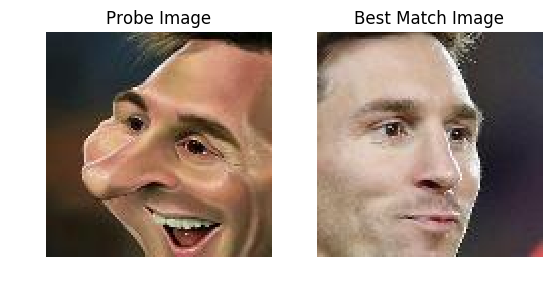

Best Match is Lionel Messi+P00012 with the probability of 0.625196 


In [36]:
#测试
test.evaluate_image('../data_aligned/Lionel Messi/C00002.jpg')

In [23]:
# 尝试P2C
# 注意： 每一次 model_root/gallery_list 换了都需要先把 PaddleInference-demo/ galley_face.fdb 删掉，否则gallery db不会更新！！！
!rm gallery_data.fdb

probe_list = '/home/aistudio/data/data153458/WebCaricature/EvaluationProtocols/FaceIdentification/P2C/FR_Probe_P2C_dev.txt'
gallery_list = '/home/aistudio/data/data153458/WebCaricature/EvaluationProtocols/FaceIdentification/P2C/FR_Gallery_P2C_dev.txt'

data_root = '../data_aligned'

test = WCFaceEval(data_root, model_root, probe_list, gallery_list)

--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [is_test_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [conv_bn_fuse_pass]
I1107 20:19:17.962126   236 fuse_pass_base.cc:57] ---  detected 53 subgraphs
--- Running IR pass [conv_eltwiseadd_bn_fuse_pass]
--- Running IR pass [embedding_eltwise_layernorm_fuse_pass]
--- Running IR pass [multihead_matmul_fuse_pass_v2]
--- Running IR pass [gpu_cpu_squeeze2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_reshape2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_flatten2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_map_matmul_v2_to_mul_pass]
I1107 20:19:18.005931   236 fuse_pass_base.cc:57] ---  detected 1 subgraphs
--- Running IR pass [gpu_cpu_map_matmul_v2_to_matmul_pass]
--- Running IR pass [matmul_scale_fuse_pass]
--- Running IR pass [multihead_matmul_fuse_pass_v3]
--- Running IR pass [gpu_cpu_map_matmul_to_mul_pass]

face_data_path not exist!,try to get faceDatabase transform!


100%|█████████████████████████████████████████| 126/126 [00:45<00:00,  2.59it/s]

finished faceDatabase transform!


Evaluating probe image: ../data_aligned/Yimou Zhang/P00013.jpg ...


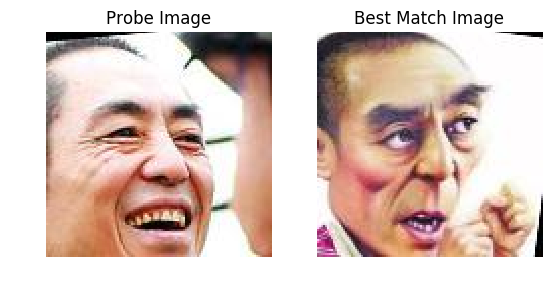

Best Match is Yimou Zhang+C00004 with the probability of 0.539016 


In [24]:
test.evaluate_image('../data_aligned/Yimou Zhang/P00013.jpg')